In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import neighbors, metrics


#import my dataset
data = pd.read_csv('C:\Users\Allison\Documents\GitHub\GeneralAssembly\DS-SF-24\Marseille_Final_Project\ks_school_wellness_policies_clean_csv.csv')

In [2]:
#explore the dataset
data.head()

,District Name,District Number,Year,elem_nutr_gen_atm,mid_nutr_gen_atm,elem_nutr_bkfst,mid_nutr_bkfst,elem_nutr_lunch,mid_nutr_lunch,elem_nutr_a_la_carte,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
0,Abilene,435,2010,B+,B+,E,E,E,E,NaN,...,0.073637,0.060356,0.175573,0.072037,0.348184,0.074271,-0.064195,0.076141,0.252673,0.072944
1,Andover,385,2010,B+,B+,E+,E+,E-,E-,E,...,0.431682,0.043095,0.668914,0.067172,0.345945,0.050462,0.509893,0.054946,0.234616,0.043001
2,Anthony-Harper,361,2010,B+,B,E-,E-,NaN,NaN,NaN,...,-0.245087,0.103889,-0.204939,0.111004,0.210916,0.144562,-0.404794,0.091061,-0.274760,0.101217
3,Arkansas City,470,2010,B+,B+,A,A,A,A,NaN,...,-0.070124,0.065053,0.005581,0.081045,0.019761,0.068405,-0.102936,0.059151,0.016154,0.064384
4,Atchison,409,2010,B+,B+,E-,E,E-,E-,NaN,...,0.015809,0.094373,-0.211118,0.099261,0.006293,0.098217,-0.002524,0.093781,0.019301,0.090991


In [3]:
len(data)

251

In [4]:
my_list = data.columns.values
for i in my_list:
    print i

District Name
District Number
Year
elem_nutr_gen_atm
mid_nutr_gen_atm
elem_nutr_bkfst
mid_nutr_bkfst
elem_nutr_lunch
mid_nutr_lunch
elem_nutr_a_la_carte
mid_nutr_a_la_carte
elem_nutr_vend
mid_nutr_vend
elem_nutr_sch_store
mid_nutr_sch_store
elem_nutr_sch_day
mid_nutr_sch_day
elem_nutr_aft_sch_prog
mid_nutr_aft_sch_prog
elem_ne_gen_guide_and_class
mid_ne_gen_guide_and_class
elem_ne_cafeteria
mid_ne_cafeteria
elem_ne_events_dur_sch_day
mid_ne_events_dur_sch_day
elem_ne_aft_sch_prog
mid_ne_aft_sch_prog
elem_ne_fam_comm
mid_ne_fam_comm
elem_ne_staff_well
mid_ne_staff_well
elem_pa_gen_guide_pe_class
mid_pa_gen_guide_pe_class
elem_pa_thru_day
mid_pa_thru_day
elem_pa_punish
mid_pa_punish
elem_pa_recess
mid_pa_recess
elem_pa_bef_aft_sch
mid_pa_bef_aft_sch
elem_pa_fam_comm
mid_pa_fam_comm
Notes
leaid
leaname
fips
stateabb
year
grade
three_mean_edfa_ela
three_se_edfa_ela
three_mean_edfa_math
three_se_edfa_math
four_mean_edfa_ela
four_se_edfa_ela
four_mean_edfa_math
four_se_edfa_math
five_mean_ed

In [5]:
data.describe()

C:\Users\Allison\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,District Number,Year,Notes,leaid,fips,year,grade,three_mean_edfa_ela,three_se_edfa_ela,three_mean_edfa_math,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
count,251.000000,251.0,0.0,2.510000e+02,251.0,251.0,251.000000,220.000000,220.000000,220.000000,...,219.000000,219.000000,226.000000,226.000000,226.000000,226.000000,228.000000,228.000000,229.000000,229.000000
mean,352.549801,2010.0,NaN,2.007587e+06,20.0,2010.0,3.318725,0.060373,0.128779,0.040563,...,0.054989,0.119010,0.012370,0.131012,0.019314,0.124437,0.049950,0.128113,0.037101,0.123538
std,99.059904,0.0,NaN,3.439995e+03,0.0,0.0,0.996999,0.289454,0.050048,0.307185,...,0.343802,0.043349,0.291672,0.049684,0.360863,0.049426,0.280918,0.048205,0.334971,0.047096
min,101.000000,2010.0,NaN,2.000001e+06,20.0,2010.0,3.000000,-0.792894,0.016431,-0.734705,...,-0.827827,0.015950,-0.748603,0.018052,-0.795048,0.018335,-0.691615,0.018767,-0.802230,0.020203
25%,270.500000,2010.0,NaN,2.005160e+06,20.0,2010.0,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,358.000000,2010.0,NaN,2.007740e+06,20.0,2010.0,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,437.000000,2010.0,NaN,2.010425e+06,20.0,2010.0,3.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,512.000000,2010.0,NaN,2.013110e+06,20.0,2010.0,8.000000,0.889860,0.231707,0.745791,...,0.897513,0.204389,0.996598,0.228141,1.454810,0.261316,1.058775,0.252078,1.314681,0.241432


In [6]:
#delete columns I know I won't be using
del data['three_se_edfa_ela']
del data['three_se_edfa_math']
del data['four_se_edfa_ela']
del data['four_se_edfa_math']
del data['five_se_edfa_ela']
del data['five_se_edfa_math']
del data['six_se_edfa_ela']
del data['six_se_edfa_math']
del data['seven_se_edfa_ela']
del data['seven_se_edfa_math']
del data['eight_se_edfa_ela']
del data['eight_se_edfa_math']
del data['Notes']
del data['leaid']
del data['leaname']
del data['fips']
del data['stateabb']
del data['year']
del data['grade']
del data['District Number']
del data['Year']

#delete columns with greater than 15% missing observations (I did this in Excel. How to see all of data.describe?)
del data['mid_pa_recess']
del data['elem_nutr_sch_store']
del data['mid_ne_aft_sch_prog']
del data['elem_ne_aft_sch_prog']
del data['mid_nutr_aft_sch_prog']
del data['elem_nutr_aft_sch_prog']
del data['mid_nutr_sch_store']
del data['elem_nutr_vend']
del data['elem_nutr_a_la_carte']
del data['mid_nutr_a_la_carte']
del data['mid_nutr_vend']
del data['elem_pa_bef_aft_sch']
del data['mid_pa_bef_aft_sch']

data.head()

,District Name,elem_nutr_gen_atm,mid_nutr_gen_atm,elem_nutr_bkfst,mid_nutr_bkfst,elem_nutr_lunch,mid_nutr_lunch,elem_nutr_sch_day,mid_nutr_sch_day,elem_ne_gen_guide_and_class,...,four_mean_edfa_ela,four_mean_edfa_math,five_mean_edfa_ela,five_mean_edfa_math,six_mean_edfa_ela,six_mean_edfa_math,seven_mean_edfa_ela,seven_mean_edfa_math,eight_mean_edfa_ela,eight_mean_edfa_math
0,Abilene,B+,B+,E,E,E,E,A+,A+,A,...,-0.012612,-0.200108,0.127019,-0.135540,0.126632,0.073637,0.175573,0.348184,-0.064195,0.252673
1,Andover,B+,B+,E+,E+,E-,E-,A-,A-,B+,...,0.302901,0.341898,0.533983,0.594967,0.435067,0.431682,0.668914,0.345945,0.509893,0.234616
2,Anthony-Harper,B+,B,E-,E-,NaN,NaN,A,A,E-,...,0.089148,0.055699,0.107402,0.460087,-0.278540,-0.245087,-0.204939,0.210916,-0.404794,-0.274760
3,Arkansas City,B+,B+,A,A,A,A,B+,B+,A-,...,-0.153506,-0.016027,0.000737,0.057150,0.008406,-0.070124,0.005581,0.019761,-0.102936,0.016154
4,Atchison,B+,B+,E-,E,E-,E-,A+,A+,B,...,-0.406145,-0.616993,-0.196663,-0.194538,0.004002,0.015809,-0.211118,0.006293,-0.002524,0.019301


In [7]:
#replace the wellness policy scores with numbers (Basic(B), Advanced(A), and Exemplary(E))
data.replace(to_replace = ('B-', 'B', 'B+', 'A-', 'A', 'A+', 'E-', 'E', 'E+'), value = (1, 2, 3, 4, 5, 6, 7, 8, 9), inplace = True)

data.head()

,District Name,elem_nutr_gen_atm,mid_nutr_gen_atm,elem_nutr_bkfst,mid_nutr_bkfst,elem_nutr_lunch,mid_nutr_lunch,elem_nutr_sch_day,mid_nutr_sch_day,elem_ne_gen_guide_and_class,...,four_mean_edfa_ela,four_mean_edfa_math,five_mean_edfa_ela,five_mean_edfa_math,six_mean_edfa_ela,six_mean_edfa_math,seven_mean_edfa_ela,seven_mean_edfa_math,eight_mean_edfa_ela,eight_mean_edfa_math
0,Abilene,3.0,3.0,8.0,8.0,8.0,8.0,6.0,6.0,5.0,...,-0.012612,-0.200108,0.127019,-0.135540,0.126632,0.073637,0.175573,0.348184,-0.064195,0.252673
1,Andover,3.0,3.0,9.0,9.0,7.0,7.0,4.0,4.0,3.0,...,0.302901,0.341898,0.533983,0.594967,0.435067,0.431682,0.668914,0.345945,0.509893,0.234616
2,Anthony-Harper,3.0,2.0,7.0,7.0,NaN,NaN,5.0,5.0,7.0,...,0.089148,0.055699,0.107402,0.460087,-0.278540,-0.245087,-0.204939,0.210916,-0.404794,-0.274760
3,Arkansas City,3.0,3.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,...,-0.153506,-0.016027,0.000737,0.057150,0.008406,-0.070124,0.005581,0.019761,-0.102936,0.016154
4,Atchison,3.0,3.0,7.0,8.0,7.0,7.0,6.0,6.0,2.0,...,-0.406145,-0.616993,-0.196663,-0.194538,0.004002,0.015809,-0.211118,0.006293,-0.002524,0.019301


In [8]:
#drop missing values

len(data)

251

In [9]:
#print data.count()
dropped_data = data.dropna(how='any', inplace=False)
#dropped_data.count()
#rs  = []
#for i in dropped_data.keys():
#    if i.startswith("elem"):
#        rs.append(i)
#print rs

In [10]:
len(dropped_data)


138

In [11]:
print data.corr()

                             elem_nutr_gen_atm  mid_nutr_gen_atm  \
elem_nutr_gen_atm                     1.000000          0.693589   
mid_nutr_gen_atm                      0.693589          1.000000   
elem_nutr_bkfst                       0.143740          0.032878   
mid_nutr_bkfst                        0.132659          0.061135   
elem_nutr_lunch                       0.068667          0.008011   
mid_nutr_lunch                        0.050501          0.019324   
elem_nutr_sch_day                     0.062104         -0.053492   
mid_nutr_sch_day                     -0.001984         -0.020098   
elem_ne_gen_guide_and_class           0.210218          0.100705   
mid_ne_gen_guide_and_class            0.167983          0.095694   
elem_ne_cafeteria                     0.108874         -0.016293   
mid_ne_cafeteria                      0.089358         -0.022122   
elem_ne_events_dur_sch_day            0.026134          0.031534   
mid_ne_events_dur_sch_day            -0.010843  

In [12]:
#new dataset with columns of average nutrition, nutrition education, and physical activity scores... perhaps average of all scores
#for a wp topic (nutrition, nutrition ed, physical activity) will work better. desperate, perhaps. but we'll see what we get.

avg_data = pd.read_csv('C:\Users\Allison\Documents\GitHub\GeneralAssembly\DS-SF-24\Marseille_Final_Project\ks_school_wellness_policies_clean_csv3.csv')

In [13]:
avg_data.head()

,avg_elem_nutr_score,avg_mid_nutr_score,avg_elem_ne_scores,avg_mid_ne_scores,avg_elem_pa_scores,avg_mid_pa_scores,three_mean_edfa_ela,three_se_edfa_ela,three_mean_edfa_math,three_se_edfa_math,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
0,6.8,7.142857,7.000000,5.833333,4.500000,4.166667,-0.098640,0.071126,-0.251232,0.077591,...,0.073637,0.060356,0.175573,0.072037,0.348184,0.074271,-0.064195,0.076141,0.252673,0.072944
1,6.2,5.833333,2.200000,1.800000,2.166667,3.000000,0.226781,0.048298,0.111297,0.056068,...,0.431682,0.043095,0.668914,0.067172,0.345945,0.050462,0.509893,0.054946,0.234616,0.043001
2,5.0,4.666667,7.600000,7.600000,5.142857,4.666667,-0.283679,0.165077,-0.013566,0.177328,...,-0.245087,0.103889,-0.204939,0.111004,0.210916,0.144562,-0.404794,0.091061,-0.274760,0.101217
3,4.4,5.000000,4.666667,5.166667,3.571429,3.666667,-0.317832,0.065432,-0.028950,0.074294,...,-0.070124,0.065053,0.005581,0.081045,0.019761,0.068405,-0.102936,0.059151,0.016154,0.064384
4,6.5,6.666667,5.333333,5.500000,4.571429,4.333333,-0.357967,0.087888,-0.486108,0.096899,...,0.015809,0.094373,-0.211118,0.099261,0.006293,0.098217,-0.002524,0.093781,0.019301,0.090991


In [14]:
my_list = avg_data.columns.values
for i in my_list:
    print i

avg_elem_nutr_score
avg_mid_nutr_score
avg_elem_ne_scores
avg_mid_ne_scores
avg_elem_pa_scores
avg_mid_pa_scores
three_mean_edfa_ela
three_se_edfa_ela
three_mean_edfa_math
three_se_edfa_math
four_mean_edfa_ela
four_se_edfa_ela
four_mean_edfa_math
four_se_edfa_math
five_mean_edfa_ela
five_se_edfa_ela
five_mean_edfa_math
five_se_edfa_math
six_mean_edfa_ela
six_se_edfa_ela
six_mean_edfa_math
six_se_edfa_math
seven_mean_edfa_ela
seven_se_edfa_ela
seven_mean_edfa_math
seven_se_edfa_math
eight_mean_edfa_ela
eight_se_edfa_ela
eight_mean_edfa_math
eight_se_edfa_math


In [15]:
#drop missing values

dropped_avg_data = avg_data.dropna(how='any', inplace=False)

len(dropped_avg_data)

186

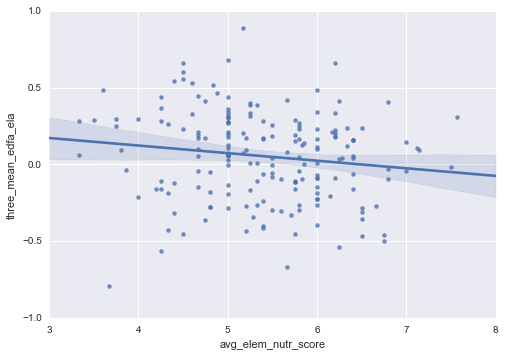

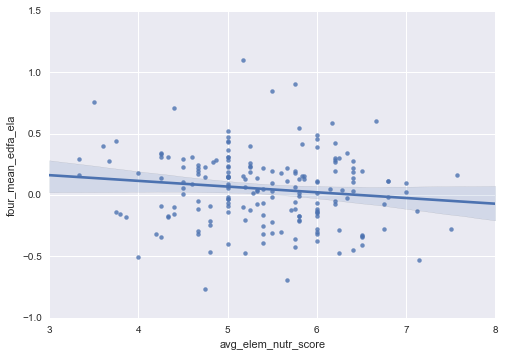

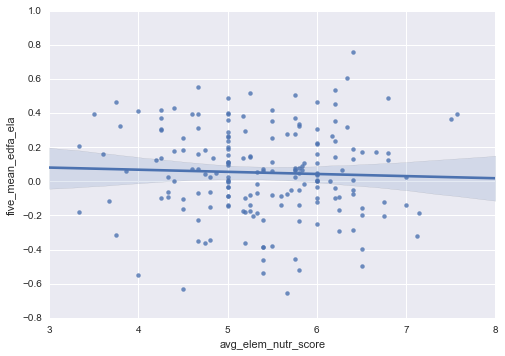

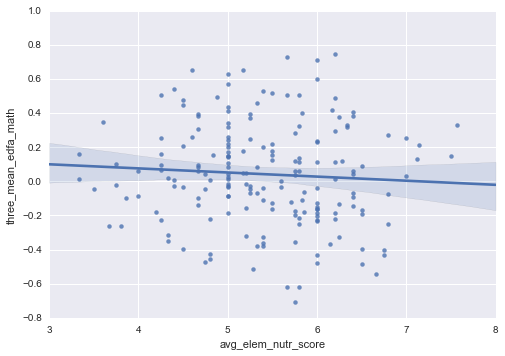

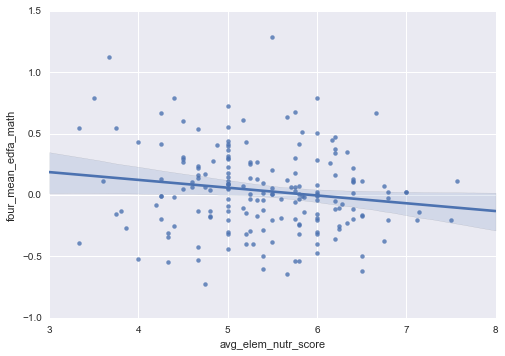

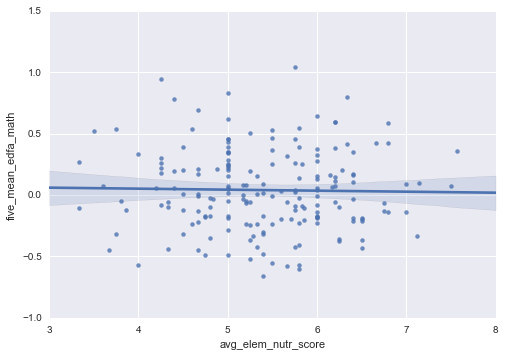

In [16]:
#let's look at nutrition-related wellness policy components in elementary school  

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.three_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.four_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.five_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.three_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.four_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_nutr_score, dropped_avg_data.five_mean_edfa_math)
plt.show()

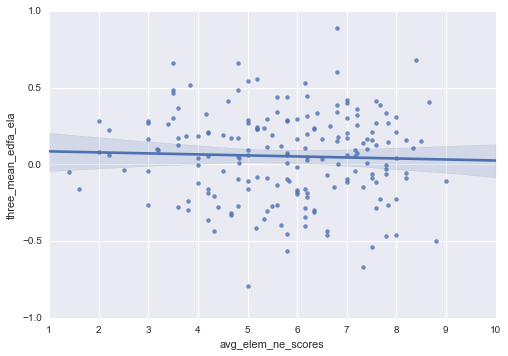

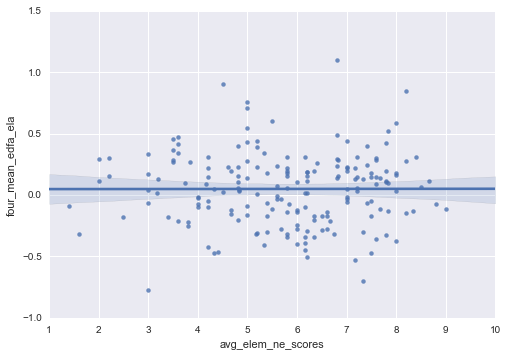

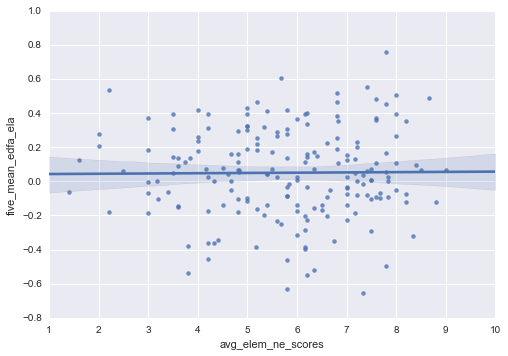

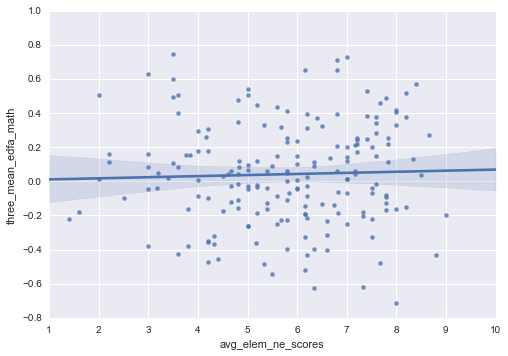

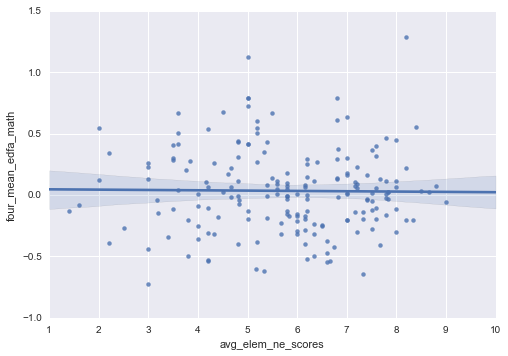

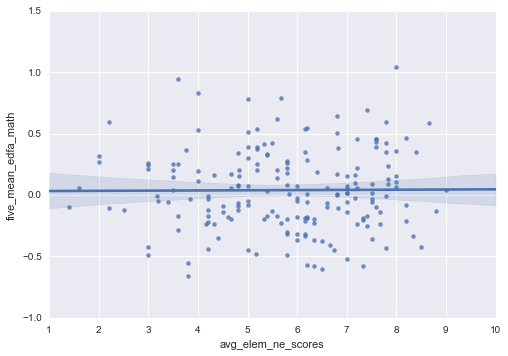

In [17]:
#let's look at nutrition education-related wellness policy components in elementary school  

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.three_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.four_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.five_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.three_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.four_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_ne_scores, dropped_avg_data.five_mean_edfa_math)
plt.show()

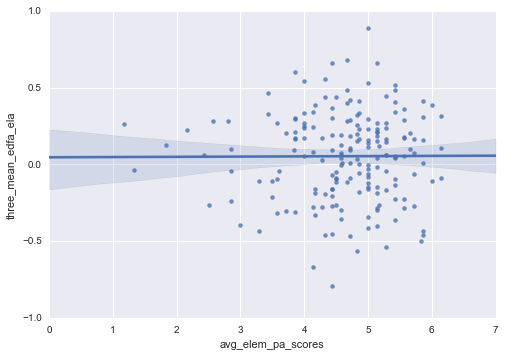

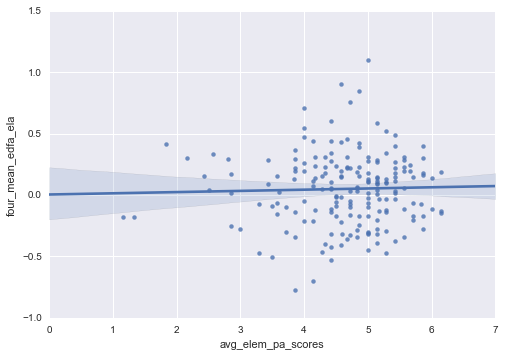

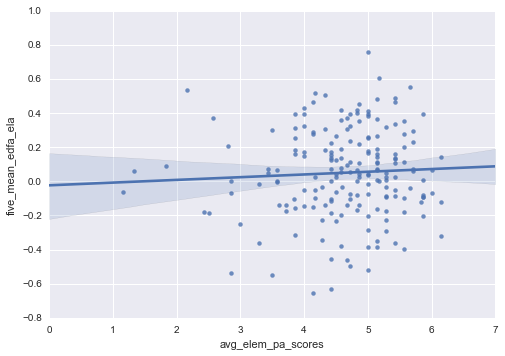

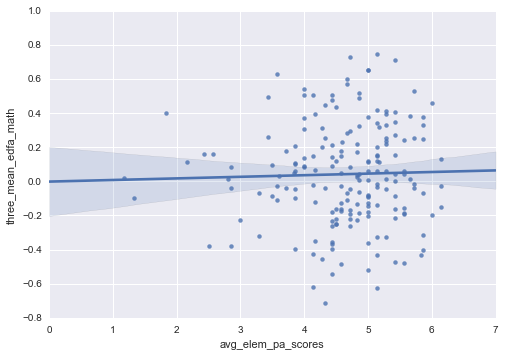

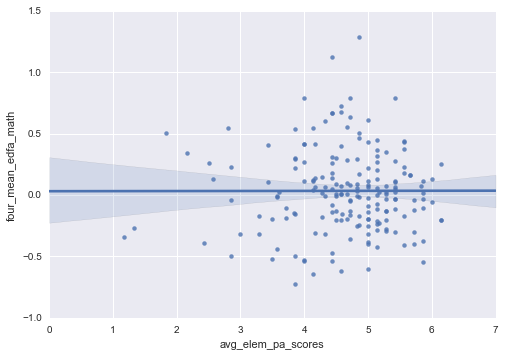

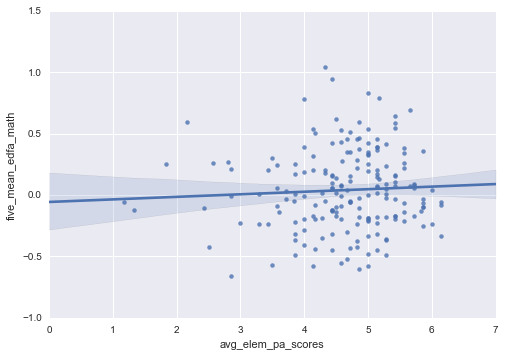

In [18]:
#let's look at physical activity-related wellness policy components in elementary school  

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.three_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.four_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.five_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.three_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.four_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_elem_pa_scores, dropped_avg_data.five_mean_edfa_math)
plt.show()

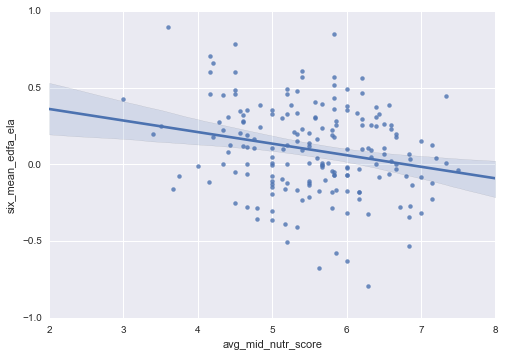

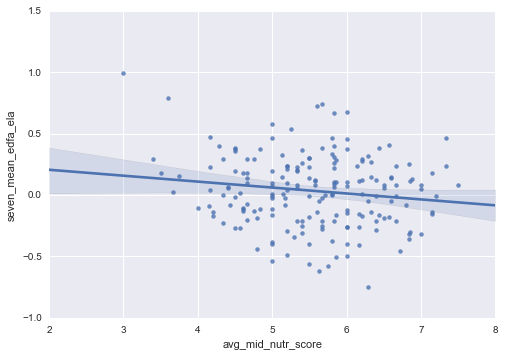

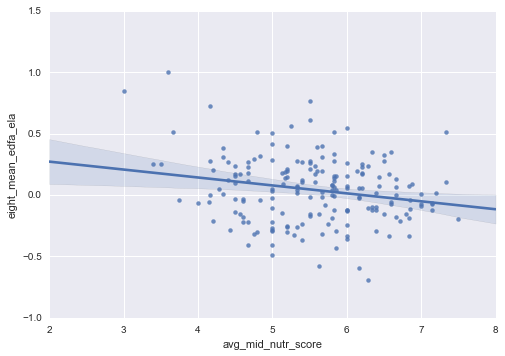

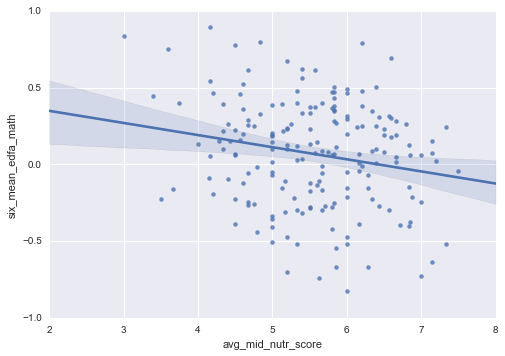

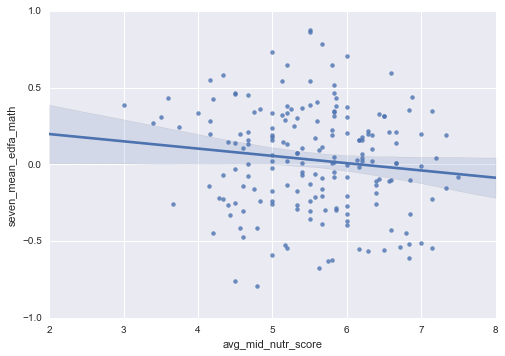

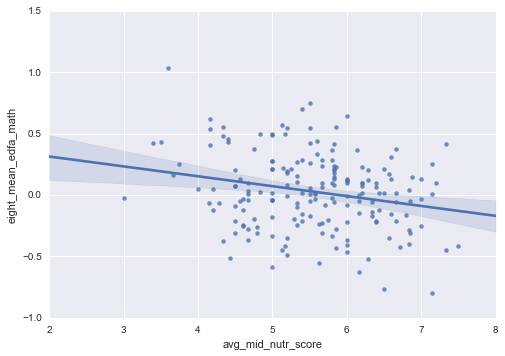

In [19]:
#let's look at nutrition-related wellness policy components in middle school  
##prob some of the strongest correlation I found... but still not meaningful

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.six_mean_edfa_ela) 
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.seven_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.eight_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.six_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.seven_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_nutr_score, dropped_avg_data.eight_mean_edfa_math)
plt.show()

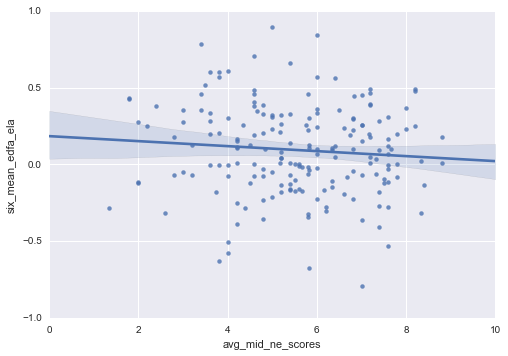

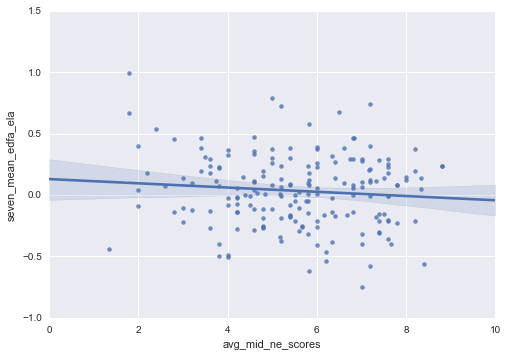

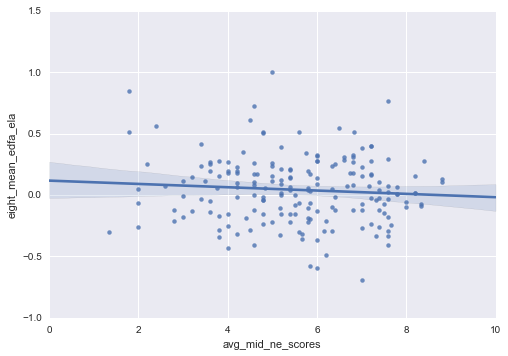

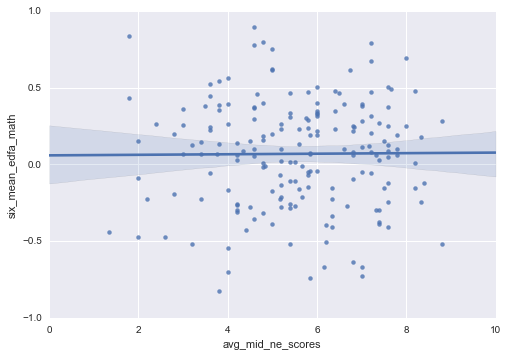

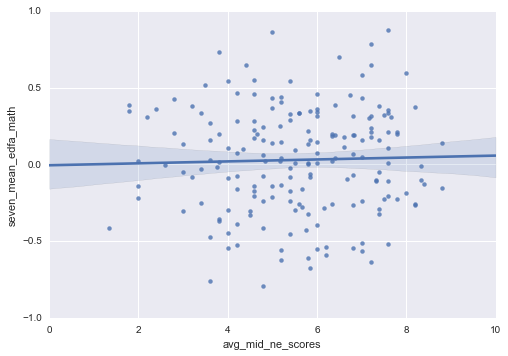

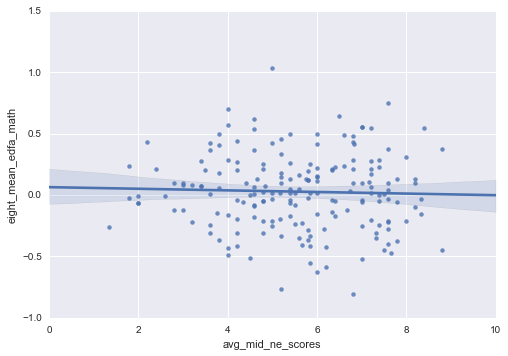

In [20]:
#let's look at nutrition education-related wellness policy components in middle school  

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.six_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.seven_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.eight_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.six_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.seven_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_ne_scores, dropped_avg_data.eight_mean_edfa_math)
plt.show()

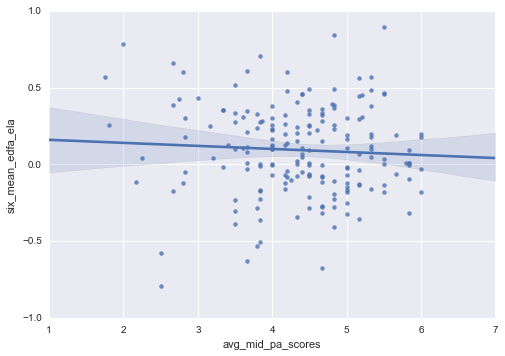

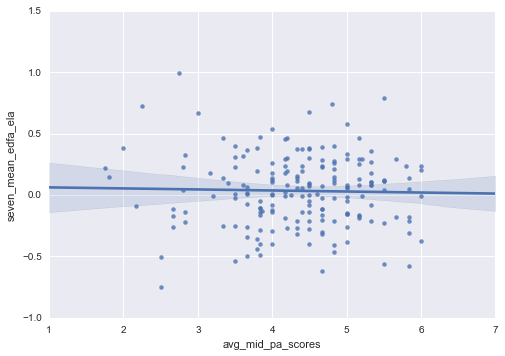

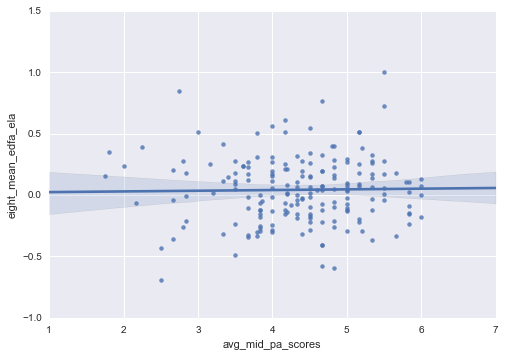

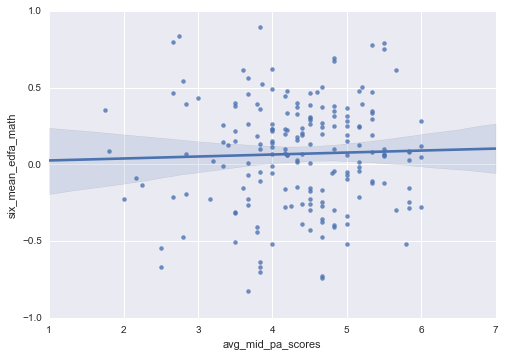

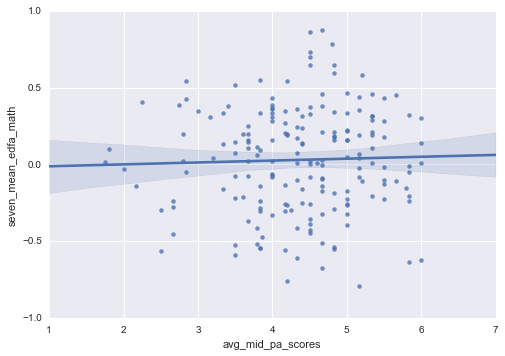

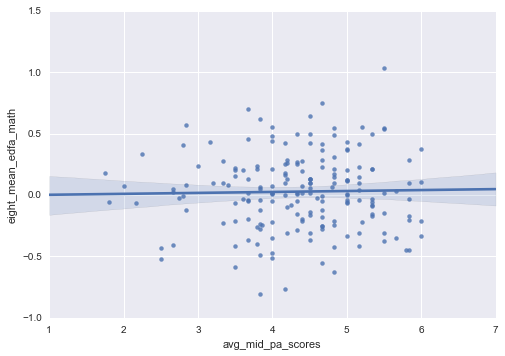

In [21]:
#let's look at physical activity-related wellness policy components in middle school  

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.six_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.seven_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.eight_mean_edfa_ela)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.six_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.seven_mean_edfa_math)
plt.show()

sns.regplot(dropped_avg_data.avg_mid_pa_scores, dropped_avg_data.eight_mean_edfa_math)
plt.show()

In [22]:
dropped_avg_data.corr()

,avg_elem_nutr_score,avg_mid_nutr_score,avg_elem_ne_scores,avg_mid_ne_scores,avg_elem_pa_scores,avg_mid_pa_scores,three_mean_edfa_ela,three_se_edfa_ela,three_mean_edfa_math,three_se_edfa_math,...,six_mean_edfa_math,six_se_edfa_math,seven_mean_edfa_ela,seven_se_edfa_ela,seven_mean_edfa_math,seven_se_edfa_math,eight_mean_edfa_ela,eight_se_edfa_ela,eight_mean_edfa_math,eight_se_edfa_math
avg_elem_nutr_score,1.000000,0.846815,0.430037,0.393602,0.327059,0.235428,-0.143999,-0.176139,-0.068014,-0.157334,...,-0.126949,-0.200399,-0.104801,-0.087786,-0.094773,-0.075114,-0.158037,-0.134786,-0.164383,-0.133097
avg_mid_nutr_score,0.846815,1.000000,0.435405,0.429826,0.280110,0.246165,-0.169527,-0.265444,-0.107184,-0.270748,...,-0.201396,-0.269735,-0.147131,-0.202364,-0.123152,-0.201794,-0.212933,-0.239527,-0.232752,-0.230854
avg_elem_ne_scores,0.430037,0.435405,1.000000,0.914428,0.603624,0.519329,-0.037692,0.004808,0.035211,-0.003579,...,0.044617,-0.040441,-0.066518,0.026553,0.048634,0.037270,-0.075191,0.024524,-0.023913,0.037953
avg_mid_ne_scores,0.393602,0.429826,0.914428,1.000000,0.561787,0.548620,-0.067398,-0.004049,0.018663,-0.023481,...,0.008419,-0.062072,-0.096829,0.006664,0.030109,0.006337,-0.081734,-0.002933,-0.034802,0.016759
avg_elem_pa_scores,0.327059,0.280110,0.603624,0.561787,1.000000,0.737036,0.004574,0.160686,0.027921,0.142227,...,0.047161,0.087350,-0.047335,0.179203,0.013594,0.160421,-0.044621,0.134646,-0.021437,0.175262
avg_mid_pa_scores,0.235428,0.246165,0.519329,0.548620,0.737036,1.000000,-0.014030,0.069451,-0.006160,0.029483,...,0.033095,0.008732,-0.025695,0.050128,0.032245,0.034887,0.018574,0.083317,0.022304,0.089527
three_mean_edfa_ela,-0.143999,-0.169527,-0.037692,-0.067398,0.004574,-0.014030,1.000000,0.128048,0.755991,0.150294,...,0.320204,0.138201,0.426696,0.147740,0.212118,0.073599,0.372648,0.107834,0.335059,0.114902
three_se_edfa_ela,-0.176139,-0.265444,0.004808,-0.004049,0.160686,0.069451,0.128048,1.000000,0.106952,0.956332,...,0.104850,0.890027,0.031605,0.884359,0.024945,0.880220,0.120367,0.897014,0.123153,0.897051
three_mean_edfa_math,-0.068014,-0.107184,0.035211,0.018663,0.027921,-0.006160,0.755991,0.106952,1.000000,0.200578,...,0.232448,0.087478,0.335985,0.137454,0.197938,0.072893,0.345054,0.092930,0.296962,0.107181
three_se_edfa_math,-0.157334,-0.270748,-0.003579,-0.023481,0.142227,0.029483,0.150294,0.956332,0.200578,1.000000,...,0.071834,0.867752,0.010596,0.861072,0.023061,0.866469,0.099605,0.866064,0.103614,0.869949


In [23]:
#no good result from average scores; try with another dataset where I've
#added together the scores for elem nutrition, middle nut, elem ne, mid ne, and elem pa and mid pa
total_data = pd.read_csv('C:\Users\Allison\Documents\GitHub\GeneralAssembly\DS-SF-24\Marseille_Final_Project\ks_school_wellness_policies_csv_sum.csv')

In [24]:
len(total_data)

251

In [25]:
total_data.head()

,sum_elem_nutr_score,sum_mid_nutr_score,sum_elem_ne_scores,sum_mid_ne_scores,sum_elem_pa_scores,sum_mid_pa_scores,total_elem_wp,total_mid_wp,three_mean_edfa_ela,three_mean_edfa_math,four_mean_edfa_ela,four_mean_edfa_math,five_mean_edfa_ela,five_mean_edfa_math,six_mean_edfa_ela,six_mean_edfa_math,seven_mean_edfa_ela,seven_mean_edfa_math,eight_mean_edfa_ela,eight_mean_edfa_math
0,34,50,42,35,27,25,103,110,-0.098640,-0.251232,-0.012612,-0.200108,0.127019,-0.135540,0.126632,0.073637,0.175573,0.348184,-0.064195,0.252673
1,31,35,11,9,13,15,55,59,0.226781,0.111297,0.302901,0.341898,0.533983,0.594967,0.435067,0.431682,0.668914,0.345945,0.509893,0.234616
2,15,14,38,38,36,28,89,80,-0.283679,-0.013566,0.089148,0.055699,0.107402,0.460087,-0.278540,-0.245087,-0.204939,0.210916,-0.404794,-0.274760
3,22,35,28,31,25,22,75,88,-0.317832,-0.028950,-0.153506,-0.016027,0.000737,0.057150,0.008406,-0.070124,0.005581,0.019761,-0.102936,0.016154
4,39,40,32,33,32,26,103,99,-0.357967,-0.486108,-0.406145,-0.616993,-0.196663,-0.194538,0.004002,0.015809,-0.211118,0.006293,-0.002524,0.019301


In [26]:
dropped_total_data = total_data.dropna(how='any', inplace=False)

In [27]:
len(dropped_total_data)

190

In [28]:
print dropped_total_data.corr()

                      sum_elem_nutr_score  sum_mid_nutr_score  \
sum_elem_nutr_score              1.000000            0.670665   
sum_mid_nutr_score               0.670665            1.000000   
sum_elem_ne_scores               0.378393            0.355633   
sum_mid_ne_scores                0.292718            0.412867   
sum_elem_pa_scores               0.175947            0.152423   
sum_mid_pa_scores                0.166497            0.273427   
total_elem_wp                    0.685198            0.524048   
total_mid_wp                     0.511755            0.760463   
three_mean_edfa_ela             -0.137812           -0.155891   
three_mean_edfa_math            -0.119586           -0.106640   
four_mean_edfa_ela              -0.115575           -0.166704   
four_mean_edfa_math             -0.138137           -0.167719   
five_mean_edfa_ela              -0.081063           -0.147656   
five_mean_edfa_math             -0.096916           -0.148048   
six_mean_edfa_ela        

In [31]:
#It doesn't look like this changed anything, but enough is enough try PCA on this dataset...

AllWellnessVariables = dropped_total_data.columns.values

X = dropped_total_data[AllWellnessVariables]
del X['three_mean_edfa_ela']
del X['three_mean_edfa_math']
del X['four_mean_edfa_ela']
del X['four_mean_edfa_math']
del X['five_mean_edfa_ela']
del X['five_mean_edfa_math']
del X['six_mean_edfa_ela']
del X['six_mean_edfa_math']
del X['seven_mean_edfa_ela']
del X['seven_mean_edfa_math']
del X['eight_mean_edfa_ela']
del X['eight_mean_edfa_math']

X.shape

(190, 8)

In [54]:
#standardize our data

def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X - X_Min)/(X_Max - X_Min)
    return X_Standardized

In [55]:
for i in [AllWellnessVariables]:
    dropped_total_data[i] = Standardize(dropped_total_data[i])
    
dropped_total_data.head()

C:\Users\Allison\Anaconda2\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,sum_elem_nutr_score,sum_mid_nutr_score,sum_elem_ne_scores,sum_mid_ne_scores,sum_elem_pa_scores,sum_mid_pa_scores,total_elem_wp,total_mid_wp,three_mean_edfa_ela,three_mean_edfa_math,four_mean_edfa_ela,four_mean_edfa_math,five_mean_edfa_ela,five_mean_edfa_math,six_mean_edfa_ela,six_mean_edfa_math,seven_mean_edfa_ela,seven_mean_edfa_math,eight_mean_edfa_ela,eight_mean_edfa_math
0,0.520833,0.892857,0.807692,0.70,0.627907,0.694444,0.666667,0.780142,0.412570,0.315291,0.405035,0.261023,0.553526,0.307687,0.544488,0.522485,0.529552,0.684121,0.369709,0.574388
1,0.458333,0.625000,0.211538,0.18,0.302326,0.416667,0.326241,0.418440,0.605956,0.564259,0.573850,0.529914,0.842263,0.735948,0.727346,0.730007,0.812237,0.682781,0.707992,0.564556
2,0.125000,0.250000,0.730769,0.76,0.837209,0.777778,0.567376,0.567376,0.302608,0.478509,0.459481,0.387930,0.539607,0.656875,0.304278,0.337754,0.311519,0.601978,0.169010,0.287204
3,0.270833,0.625000,0.538462,0.62,0.581395,0.611111,0.468085,0.624113,0.282312,0.467944,0.329650,0.352346,0.463930,0.420652,0.474397,0.439162,0.432147,0.487590,0.346881,0.445605
4,0.625000,0.714286,0.615385,0.66,0.744186,0.722222,0.666667,0.702128,0.258461,0.153989,0.194476,0.054204,0.323876,0.273100,0.471785,0.488968,0.307978,0.479530,0.406049,0.447319


In [56]:
#let's try PCA

clf = PCA(2)
X_trans = clf.fit_transform(X)
X_trans.shape

(190L, 2L)

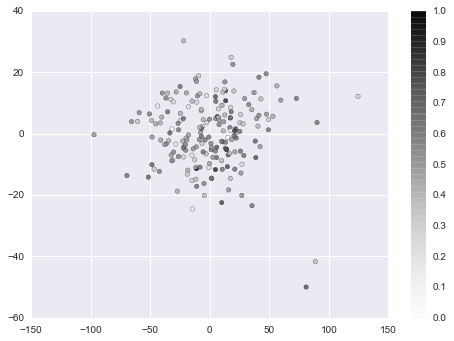

In [57]:
y1 = dropped_total_data['three_mean_edfa_ela']

plt.scatter(X_trans[:,0], X_trans[:,1], c=y1, alpha = 0.8)
plt.colorbar()

In [58]:
y2 = dropped_total_data['three_mean_edfa_math']
y3 = dropped_total_data['four_mean_edfa_ela']
y4 = dropped_total_data['four_mean_edfa_math']
y5 = dropped_total_data['five_mean_edfa_ela']
y6 = dropped_total_data['five_mean_edfa_math']
y7 = dropped_total_data['six_mean_edfa_ela']
y8 = dropped_total_data['six_mean_edfa_math']


[  7.72113385e-01   9.70131830e-02   7.38439818e-02   3.80435350e-02
   1.26963755e-02   6.28954006e-03   3.94452722e-33   1.66749359e-33]


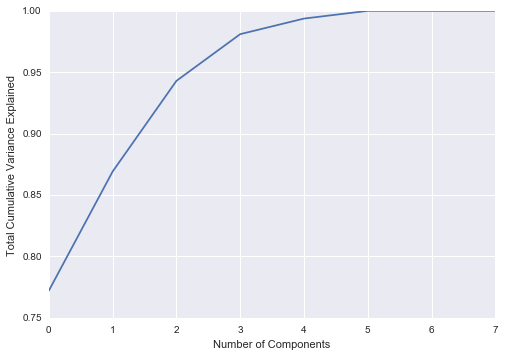

In [59]:
AllPCAs = PCA().fit(X)
print AllPCAs.explained_variance_ratio_
plt.xlabel('Number of Components')
plt.ylabel('Total Cumulative Variance Explained')
plt.plot(np.cumsum(AllPCAs.explained_variance_ratio_))

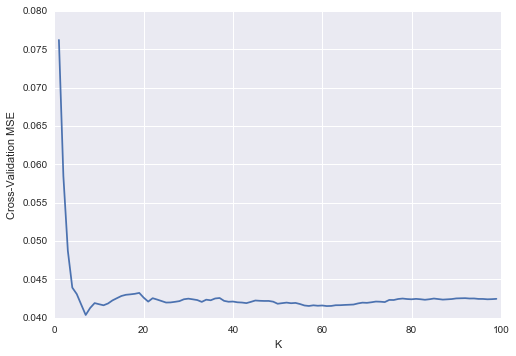

In [60]:
clf = PCA(3)
X_trans = clf.fit_transform(X)
RangeOfK = range(1,100)

CV_Scores = []
for i in RangeOfK:
    knn = neighbors.KNeighborsRegressor(n_neighbors = i, weights = 'uniform')
    CV_Scores.append( -cross_val_score(knn, X_trans, y2, cv=10,
                                      scoring = 'mean_squared_error').mean())
    
plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation MSE")
plt.show()

In [61]:
print np.argmin(CV_Scores)
print CV_Scores
print RangeOfK[np.argmin(CV_Scores)]

6
[0.076211228145155546, 0.05845828867602483, 0.048734190840962102, 0.043934806179585353, 0.043090365176204778, 0.041717479673902921, 0.040368153015661226, 0.041284048146499601, 0.041917453609603895, 0.041769012167833297, 0.041631916093631462, 0.041865920470653781, 0.042268545189171114, 0.042559526245742427, 0.042843626716754707, 0.042998571253998641, 0.043055214744934997, 0.043126687863590231, 0.043243992955748128, 0.042618391381394137, 0.042110960746837456, 0.042555609575277778, 0.042377545218197851, 0.042183372060214518, 0.041988743059976581, 0.042002725216443305, 0.04208241769653169, 0.04217370096911046, 0.042416104192723118, 0.042494435217323587, 0.042407557104232767, 0.042310691094965748, 0.042074194448423891, 0.042361065144983064, 0.042285427356195178, 0.042518784510294907, 0.042580845390848457, 0.042209400026368214, 0.04209274118853934, 0.042119875193674647, 0.042018818337356934, 0.041989149294035619, 0.041914152661590626, 0.042075634648734692, 0.042254405806182602, 0.042215888

In [62]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 6, weights = 'uniform')

#X = dropped_total_data[AllVariables]
#del X['three_mean_edfa_ela']
#y = dropped_total_data['three_mean_edfa_ela']

knn.fit(X,y2)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [63]:
Score1 = knn.score(X,y2)

y2_hat = knn.predict(X)
Score2 = float(sum(y2_hat == y2))/len(dropped_total_data)

#what's going on with Score2? do I really have an accuracy of 0 using my prediction?  
print Score1
print Score2

0.204354504899
0.0


In [64]:
#Let's work with decision trees now to see if we can do any better... only one direction to go, really... haha!

from sklearn.tree import DecisionTreeRegressor   #Decision Tree Regressor
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [65]:
#I'm going to stick with my X (wellness variables) and y2 (third grade math scores)
#for decision trees and then a random forest

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.2)

In [66]:
treereg = DecisionTreeRegressor()
treereg.fit(X_train, y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [67]:
preds = treereg.predict(X_test)
MSE = metrics.mean_squared_error(y2_test, preds)
print "Mean Squared Error of our test set is %f" %MSE

###this doesn't seem correct to me... my model is woefully inaccurate, so why is MSE so small?

Mean Squared Error of our test set is 0.100106


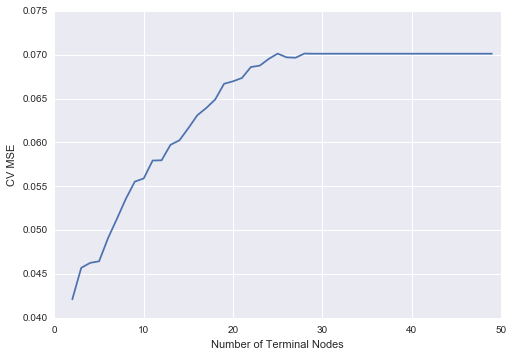

In [68]:
#tune with Max_Leaf_Nodes
Maximum_Terminal_Nodes = range (2,50)
score = []
for i in Maximum_Terminal_Nodes:
    treereg = DecisionTreeRegressor(max_leaf_nodes = i,
                                  min_samples_leaf = 5,
                                  random_state = 24)
    score.append(-cross_val_score(treereg, X, y2, cv=10, scoring = 'mean_squared_error').mean())
    
plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV MSE")
plt.show()

###the more nodes, the poorer the accuracy... is that because none of my variables are contributing to this number so they
###just complicate things?

In [69]:
CV_MSE_Min = np.argmin(score)
Nodes_Min = Maximum_Terminal_Nodes[CV_MSE_Min]
print "The best number of Nodes is %i, which results in MSE = %f" %(Nodes_Min, np.min(score))

The best number of Nodes is 2, which results in MSE = 0.042107


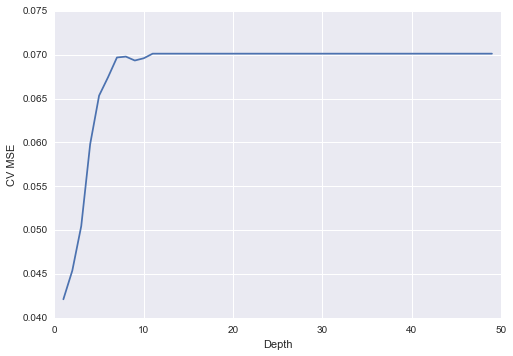

In [70]:
#tuen with Max_Depth
Maximum_Depth = range(1,50)
score = []
for i in Maximum_Depth:
    treereg = DecisionTreeRegressor(max_depth = i,
                                   min_samples_leaf = 5,
                                   random_state = 24)
    score.append(-cross_val_score(treereg, X, y2, cv=10, scoring = 'mean_squared_error').mean())
    
plt.plot(Maximum_Depth, score)
plt.xlabel("Depth")
plt.ylabel("CV MSE")
plt.show()

In [71]:
CV_MSE_Min = np.argmin(score)
Depth_Max = Maximum_Depth[CV_MSE_Min]
print "The best option for Max Depth is %i, which results in MSE = %f" %(Depth_Max, np.min(score))
###isn't max depth of 1 not a decision tree at all?

The best option for Max Depth is 1, which results in MSE = 0.042107


In [72]:
#Look at feature importance
treereg = DecisionTreeRegressor(max_depth = Maximum_Depth[CV_MSE_Min],
                               min_samples_leaf = 5,
                               random_state = 24)

treereg.fit(X,y2)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'], ascending = 0)

,feature,importance
0,sum_elem_nutr_score,1.0
1,sum_mid_nutr_score,0.0
2,sum_elem_ne_scores,0.0
3,sum_mid_ne_scores,0.0
4,sum_elem_pa_scores,0.0
5,sum_mid_pa_scores,0.0
6,total_elem_wp,0.0
7,total_mid_wp,0.0


In [74]:
#time for some random forests
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 1000,
                          max_features = 3,
                          min_samples_leaf = 10,
                          oob_score = True,
                          random_state = 1)

RF.fit(X,y2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [75]:
sorted(zip(RF.feature_importances_,X.columns.values))

[(0.065821175428143752, 'sum_mid_pa_scores'),
 (0.10332393543820798, 'sum_elem_pa_scores'),
 (0.10905279009029926, 'sum_elem_ne_scores'),
 (0.11229304377311386, 'total_mid_wp'),
 (0.11883329526582087, 'sum_mid_ne_scores'),
 (0.13802149253407647, 'total_elem_wp'),
 (0.15241082579461473, 'sum_mid_nutr_score'),
 (0.20024344167572339, 'sum_elem_nutr_score')]

In [76]:
RF.oob_score_
###this is totally wrong, no? a negative score???

-0.044321214722520708

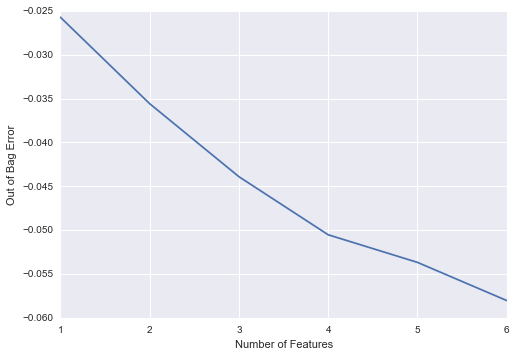

In [84]:
Features = range(1,7)
oob_score_RF = []
for i in Features:
    RF = RandomForestRegressor(n_estimators = 10000,
                              max_features = i,
                              min_samples_leaf = 10,
                              oob_score = True,
                              random_state = 1,
                              n_jobs = -1)
    RF.fit(X,y2)
    oob_score_RF.append(RF.oob_score_)
    
plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Error")
plt.show()

In [85]:
#I don't want to do any more until I understand what's happening with my models. 